<a href="https://colab.research.google.com/github/milaomrani/Car_Price_Prediction_Regression/blob/main/predict_car_sale_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?resource=download


In [2]:
!unzip "/content/drive/MyDrive/DataSet/car_sale.zip"

Archive:  /content/drive/MyDrive/DataSet/car_sale.zip
  inflating: CAR DETAILS FROM CAR DEKHO.csv  
  inflating: Car details v3.csv      
  inflating: car data.csv            


In [5]:
# Read in the insurance dataset
car = pd.read_csv("/content/car data.csv")
# car.drop("Car_Name", axis=1)
car

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [19]:
car_one_hot = pd.get_dummies(car)
car_one_hot.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Name_800,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,...,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
1,2013,4.75,9.54,43000,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,2011,2.85,4.15,5200,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
4,2014,4.60,6.87,42450,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


In [79]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [80]:
car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [11]:
len(car["Car_Name"].unique())

98

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (MinMaxScaler(), [ "Year", "Present_Price", "Kms_Driven", "Owner"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Fuel_Type", "Seller_Type", "Transmission"])
    )

car.drop(labels="Car_Name", axis=1, inplace=True)
# df.drop(labels='Car_Name',axis= 1, inplace = True)

# Create X & y
X = car.drop("Selling_Price", axis=1)
y = car["Selling_Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,2008,0.750,26000,Petrol,Individual,Manual,1
132,2017,0.950,3500,Petrol,Individual,Manual,0
194,2008,0.787,50000,Petrol,Individual,Manual,0
75,2015,6.800,36000,Petrol,Dealer,Manual,0
111,2016,1.500,8700,Petrol,Individual,Manual,0


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 184 to 102
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           240 non-null    int64  
 1   Present_Price  240 non-null    float64
 2   Kms_Driven     240 non-null    int64  
 3   Fuel_Type      240 non-null    object 
 4   Seller_Type    240 non-null    object 
 5   Transmission   240 non-null    object 
 6   Owner          240 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 15.0+ KB


In [15]:
ct.fit(X_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

In [16]:
X_train_norm.shape, X_train.shape, y_train.shape, X_test.shape, X_test_norm.shape

((240, 11), (240, 7), (240,), (61, 7), (61, 11))

In [24]:
type(X_train_norm)

numpy.ndarray

In [70]:
import numpy as np

In [49]:
X_train_norm.shape, y_train.shape, X_train.shape, y_test.shape

((240, 11), (240,), (240, 7), (61,))

In [25]:
model_car = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(X_train_norm.shape[1],)),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)]
)

model_car.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(0.01),
                   metrics=["mae"])

histroy = model_car.fit(X_train_norm, y_train, epochs=50)

Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 3.3007 - mae: 3.3007
Epoch 2/50
8/8 [==============================] - 0s 3ms/step - loss: 2.3568 - mae: 2.3568
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 2.0378 - mae: 2.0378
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 1.9667 - mae: 1.9667
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 1.8857 - mae: 1.8857
Epoch 6/50
8/8 [==============================] - 0s 3ms/step - loss: 1.8328 - mae: 1.8328
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 1.8130 - mae: 1.8130
Epoch 8/50
8/8 [==============================] - 0s 3ms/step - loss: 1.8392 - mae: 1.8392
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 1.7794 - mae: 1.7794
Epoch 10/50
8/8 [==============================] - 0s 3ms/step - loss: 1.7281 - mae: 1.7281
Epoch 11/50
8/8 [==============================] - 0s 3ms/step - loss: 1.6972 - mae: 1.69

Text(0, 0.5, 'loss')

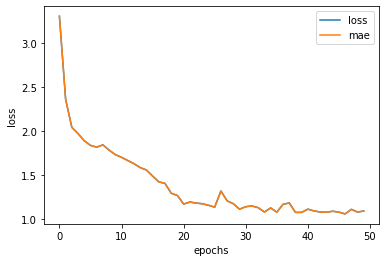

In [34]:
pd.DataFrame(histroy.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

In [29]:
model_car.evaluate(X_test_norm, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.3524 - mae: 1.3524


[1.3524060249328613, 1.3524060249328613]

In [46]:
model_car.evaluate(X_train_norm, y_train)

8/8 [==============================] - 0s 4ms/step - loss: 1.1246 - mae: 1.1246


[1.1246180534362793, 1.1246180534362793]

In [47]:
total_pred = model_car.predict(X_test_norm)
total_pred

2/2 [==============================] - 0s 4ms/step


array([[ 1.9913231 ],
       [ 8.803506  ],
       [ 6.37237   ],
       [-0.5691882 ],
       [10.340676  ],
       [ 6.961203  ],
       [ 1.1449927 ],
       [ 0.7620155 ],
       [ 1.0113622 ],
       [ 7.2140546 ],
       [ 8.398981  ],
       [ 0.6319496 ],
       [ 8.5917225 ],
       [ 2.362855  ],
       [ 6.7153225 ],
       [ 3.4580562 ],
       [ 0.7000208 ],
       [11.511439  ],
       [ 1.2821637 ],
       [ 1.9611871 ],
       [ 0.4285045 ],
       [ 7.5981197 ],
       [ 6.580391  ],
       [ 3.3811362 ],
       [ 0.68795085],
       [ 4.3773947 ],
       [ 5.9628487 ],
       [ 3.5597854 ],
       [ 1.7181622 ],
       [ 1.4499816 ],
       [ 0.42626938],
       [ 9.0560255 ],
       [-0.26747495],
       [ 3.4594228 ],
       [ 8.099616  ],
       [ 4.9403524 ],
       [ 8.181512  ],
       [ 9.254472  ],
       [ 3.281233  ],
       [ 9.540701  ],
       [ 5.8387866 ],
       [ 5.5378547 ],
       [ 4.7676787 ],
       [ 0.47230494],
       [ 6.8770347 ],
       [ 0

In [79]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [50]:
test_pred = pd.Series(total_pred.reshape(61,))
test_pred

0      1.991323
1      8.803506
2      6.372370
3     -0.569188
4     10.340676
        ...    
56     4.765186
57     8.562799
58     3.275384
59     7.323446
60     0.219989
Length: 61, dtype: float32

In [67]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [74]:
y_test.head()

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
Name: Selling_Price, dtype: float64

In [75]:
pred_car_df = pd.DataFrame(y_test)

In [76]:
pred_car_df.head()

,Selling_Price
177,0.35
289,10.11
228,4.95
198,0.15
60,6.95


In [77]:
pred_car_df = pd.concat([pred_car_df, test_pred], axis=1)

In [118]:
final_test = pd.DataFrame(y_test)
final_test = final_test.reset_index()


fianl_pred = pd.DataFrame(test_pred)
fianl_pred = fianl_pred.reset_index()


In [121]:
final_test.columns = ['mil', 'Selling_Price']

In [122]:
final_test.reset_index(drop=True)

,mil,Selling_Price
0,177,0.35
1,289,10.11
2,228,4.95
3,198,0.15
4,60,6.95
...,...,...
56,234,5.50
57,296,9.50
58,281,2.10
59,285,7.40


In [130]:
final_test = final_test.drop("mil", axis=1)
# X = car.drop("Selling_Price", axis=1)


In [131]:
final_test.head(20)


,Selling_Price
0,0.35
1,10.11
2,4.95
3,0.15
4,6.95
5,7.45
6,1.10
7,0.50
8,0.45
9,6.00


In [132]:
fianl_pred.head(20)

,index,0
0,0,1.991323
1,1,8.803506
2,2,6.372370
3,3,-0.569188
4,4,10.340676
5,5,6.961203
6,6,1.144993
7,7,0.762016
8,8,1.011362
9,9,7.214055


In [133]:
con_p_t = pd.concat([final_test, fianl_pred], axis=1)

In [134]:
con_p_t

,Selling_Price,index,0
0,0.35,0,1.991323
1,10.11,1,8.803506
2,4.95,2,6.372370
3,0.15,3,-0.569188
4,6.95,4,10.340676
...,...,...,...
56,5.50,56,4.765186
57,9.50,57,8.562799
58,2.10,58,3.275384
59,7.40,59,7.323446
